We Will be using CNN and ANN to predict Handwritten digits in this notebook


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)


60000

In [4]:
len(x_test)
x_train=x_train/255
x_test=x_test/255

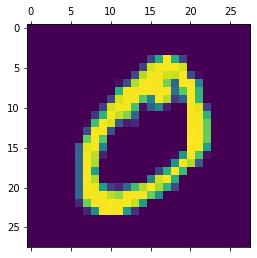

In [5]:
plt.matshow(x_train[1])

In [6]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

Using a ANN with one layer


In [7]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4704 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2736 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9252


In [8]:
model.evaluate(x_test_flat,y_test)


313/313 [==============================] - 0s 923us/step - loss: 0.2706 - accuracy: 0.9240


[0.27056702971458435, 0.9240000247955322]

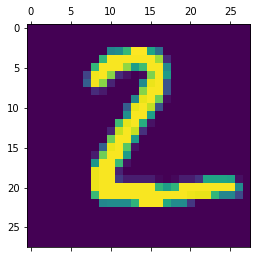

In [9]:
plt.matshow(x_test[1])

In [10]:
y_predict=model.predict(x_test_flat)

In [11]:
y_predict_labels=[np.argmax(i) for i in y_predict]


In [12]:
tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    7,    5,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,   11,  899,   18,    8,    6,   13,   11,   56,    3],
       [   4,    0,   15,  909,    0,   40,    2,   10,   23,    7],
       [   1,    1,    4,    2,  918,    0,   10,    4,   10,   32],
       [   8,    2,    2,   18,    8,  804,   13,    3,   29,    5],
       [  13,    3,    7,    1,    7,   17,  906,    2,    2,    0],
       [   1,    5,   21,    7,    9,    1,    0,  945,    4,   35],
       [   5,    6,    5,   18,    9,   31,    8,    9,  877,    6],
       [  11,    7,    1,    8,   33,    8,    0,   20,   10,  911]],
      dtype=int32)>

Using a ANN with 3 layers


In [13]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1130 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0823 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0622 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9842


In [14]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9733


[0.08871940523386002, 0.9732999801635742]

By Using a ANN with more layers we got our accuracy Improved, Now we will use CNN


In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [17]:
CNN_model=keras.Sequential([
             keras.layers.Conv2D(16, kernel_size=5, strides=1,  activation='relu', kernel_initializer='he_normal',input_shape=(28,28,1)), #C1
             keras.layers.MaxPooling2D((2,2)), #S2
             keras.layers.BatchNormalization(),
             keras.layers.Conv2D(32, kernel_size=3, strides=1, kernel_initializer='he_normal', activation='relu'), #C3
             keras.layers.MaxPooling2D((2,2)),#S4
             keras.layers.BatchNormalization(),
             keras.layers.Conv2D(64, kernel_size=3, strides=1,kernel_initializer='he_normal',  activation='relu'), #C5
             keras.layers.Dropout(0.25),
             keras.layers.Flatten(), #Flatten
             keras.layers.Dense(256, activation='relu'),
             keras.layers.Dense(128, activation='relu'),
             keras.layers.Dense(84, activation='relu'), 
             keras.layers.Dense(10, activation='softmax') #Output layer
])
CNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [18]:
CNN_model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1504 - accuracy: 0.9536
Epoch 2/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0638 - accuracy: 0.9812
Epoch 3/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0518 - accuracy: 0.9851
Epoch 4/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0422 - accuracy: 0.9879
Epoch 5/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0371 - accuracy: 0.9892
Epoch 6/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0323 - accuracy: 0.9912
Epoch 7/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0290 - accuracy: 0.9918
Epoch 8/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0276 - accuracy: 0.9922
Epoch 9/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0241 - accuracy: 0.9933
Epoch 10/20
1875/1875 [==============================] - 39s 21m

In [19]:
CNN_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0394 - accuracy: 0.9920


[0.03941882774233818, 0.9919999837875366]